<a href="https://colab.research.google.com/github/EkaterinaSheina/my-site/blob/main/lukoil_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/LKOH_03.08.2023-19.01.2024 (2).csv", sep=";", index_col=False)


<ipython-input-161-12bb592b84eb>:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv("/content/LKOH_03.08.2023-19.01.2024 (2).csv", sep=";", index_col=False)


In [ ]:
df.tail()

,<DATE>,<TIME>,<LAST>,<VOL>,<ID>,<OPER>
1672,19/01/24,16:00:00,6849.5,6860.0,6822.5,6847.0
1673,19/01/24,17:00:00,6846.5,6857.5,6841.0,6856.0
1674,19/01/24,18:00:00,6856.0,6865.0,6849.5,6865.0
1675,19/01/24,19:00:00,6864.0,6865.0,6852.0,6854.5
1676,19/01/24,20:00:00,6854.5,6855.5,6850.5,6853.5


In [ ]:
df["<DATE>"] = pd.to_datetime(df["<DATE>"] + " " + df["<TIME>"], format='%d/%m/%y %H:%M:%S')
df = df.drop(columns=["<TIME>"])

In [ ]:
df["<DATE>"] = pd.to_datetime(df["<DATE>"]).dt.to_period("h").astype("int64")

In [ ]:
df = df.sort_values(by="<DATE>")

In [ ]:
df.head()

,<DATE>,<LAST>,<VOL>,<ID>,<OPER>
0,469738,6065.0,6110.0,6040.0,6080.0
1,469739,6078.5,6118.0,6076.0,6099.5
2,469740,6099.0,6150.0,6099.0,6141.0
3,469741,6142.5,6150.0,6115.5,6135.0
4,469742,6136.0,6136.5,6116.5,6120.0


In [ ]:
df["Last lag 1"] = df["<LAST>"].shift(1)
df["Last lag 2"] = df["<LAST>"].shift(2)
df["Last lag 3"] = df["<LAST>"].shift(3)
df["Last lag 4"] = df["<LAST>"].shift(4)
df["Last lag 5"] = df["<LAST>"].shift(5)
df = df.dropna()

In [ ]:
print(df["<DATE>"].max())

473804


In [ ]:
df.head()

,<DATE>,<LAST>,<VOL>,<ID>,<OPER>,Last lag 1,Last lag 2,Last lag 3,Last lag 4,Last lag 5
5,469743,6120.0,6149.0,6118.0,6129.5,6136.0,6142.5,6099.0,6078.5,6065.0
6,469744,6129.5,6135.0,6120.0,6132.5,6120.0,6136.0,6142.5,6099.0,6078.5
7,469745,6132.5,6139.0,6120.0,6134.0,6129.5,6120.0,6136.0,6142.5,6099.0
8,469746,6134.0,6137.5,6121.5,6121.5,6132.5,6129.5,6120.0,6136.0,6142.5
9,469747,6122.0,6143.5,6122.0,6137.5,6134.0,6132.5,6129.5,6120.0,6136.0


In [ ]:
y = df["<LAST>"].to_numpy().reshape(-1, 1)
X = df[["<DATE>", "Last lag 1", "Last lag 2", "Last lag 3", "Last lag 4", "Last lag 5"]]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
full_dates = X["<DATE>"].values.astype('datetime64[h]')
train_dates = X_train["<DATE>"].values.astype('datetime64[h]')
val_dates = X_val["<DATE>"].values.astype('datetime64[h]')

In [ ]:
X_scaler = StandardScaler().fit(X_train)

X_train = X_scaler.transform(X_train).astype("float64")
y_train = y_train.reshape(-1, 1).astype("float64")
X_val = X_scaler.transform(X_val).astype("float64")
y_val = y_val.reshape(-1, 1).astype("float64")

In [ ]:
y_train.shape

(1337, 1)

In [ ]:
X_train.shape

(1337, 6)

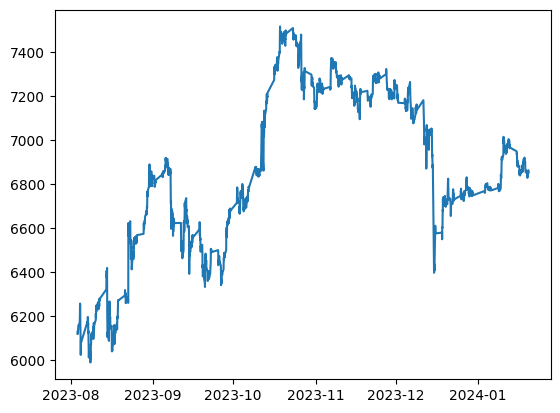

In [ ]:
fig, ax = plt.subplots()
ax.plot(full_dates, y)

In [ ]:
def plot(target, output, dates=train_dates):
    """plot with real and predicted values"""
    plt.plot(dates, target, label='y_train')
    plt.plot(dates, output, label='y_pred')
    plt.title('')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.legend()
    plt.show()

In [ ]:
INPUT_DIM = 6
OUT_DIM = 1
H_DIM_1 = 20

def elu(x, alpha = 0.01):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x, alpha = 0.01):
    return (elu(x,alpha)+alpha)*(x<=0)+(x>0)

def error_derivative(y_pred, y_true):
    return 2 * (y_true - y_pred)

def get_MSE(y_pred, y_true):
    return np.mean((y_true - y_pred) ** 2)


W1 = np.random.rand(INPUT_DIM, H_DIM_1)
b1 = np.random.rand(1, H_DIM_1)
W2 = np.random.rand(H_DIM_1, OUT_DIM)
b2 = np.random.rand(1, OUT_DIM)

W1 = (W1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
b1 = (b1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
W2 = (W2 - 0.5) * 2 * np.sqrt(1/H_DIM_1)
b2 = (b2 - 0.5) * 2 * np.sqrt(1/H_DIM_1)


ALPHA = 0.0000001
NUM_EPOCHS = 500
BATCH_SIZE = 32

loss_arr = []

for ep in range(NUM_EPOCHS):
    for batch_num in range(len(X_train) // BATCH_SIZE + bool(len(X_train) // BATCH_SIZE)):
        X_batch = X_train[batch_num*BATCH_SIZE : batch_num*BATCH_SIZE + BATCH_SIZE]
        y_batch = y_train[batch_num*BATCH_SIZE : batch_num*BATCH_SIZE + BATCH_SIZE]
        # Forward
        t1 = X_batch @ W1 + b1
        h1 = elu(t1)
        t2 = h1 @ W2 + b2
        E = np.sum(error_derivative(t2, y_batch))

        # Backward
        dE_dt2 = t2 - y_batch
        dE_dW2 = h1.T @ dE_dt2
        dE_db3 = np.sum(dE_dt2, axis=0, keepdims=True)

        dE_dh1 = dE_dt2 @ W2.T
        dE_dt1 = dE_dh1 * elu_derivative(t1)
        dE_dW1 = X_batch.T @ dE_dt1
        dE_db1 = np.sum(dE_dt1, axis=0, keepdims=True)

        # Weights update
        W1 = W1 - ALPHA * dE_dW1
        b1 = b1 - ALPHA * dE_db1
        W2 = W2 - ALPHA * dE_dW2
        b2 = b2 - ALPHA * dE_db3

    loss_arr.append(E)
    if ep % 200 == 0:
        print(f"Epoch:{ep}")
        y_train_predict = elu(X_train @ W1 + b1) @ W2 + b2
        y_val_predict = elu(X_val @ W1 + b1) @ W2 + b2
        print("Train MSE:", get_MSE(y_train_predict, y_train))
        print("Val MSE:", get_MSE(y_val_predict, y_val))


def predict(x_in):
    t1 = x_in @ W1 + b1
    h1 = elu(t1)
    t2 = h1 @ W2 + b2
    return t2


print("Result train MSE:", get_MSE(predict(X_train), y_train))
print("Result val MSE:", get_MSE(predict(X_val), y_val))

Epoch:0
Train MSE: 47310870.440391734
Val MSE: 46213430.89608036
Epoch:200
Train MSE: 855.5153875016209
Val MSE: 1075.1935105151617
Epoch:400
Train MSE: 760.5782256356654
Val MSE: 999.0280323684252
Result train MSE: 748.5565835895893
Result val MSE: 988.9134340682037


In [ ]:
y_train_predict = predict(X_train)

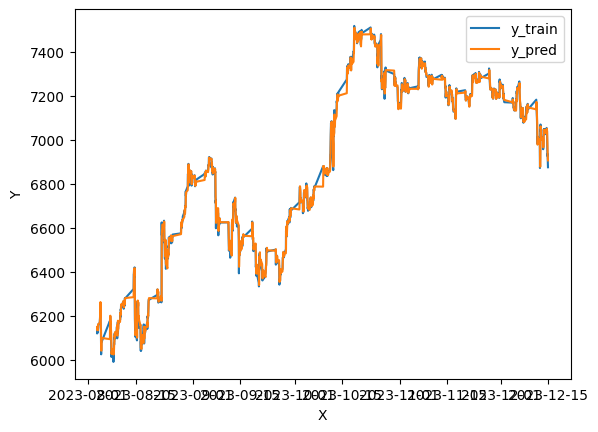

In [ ]:
plot(y_train, y_train_predict)

MSE val: 988.9134340682037


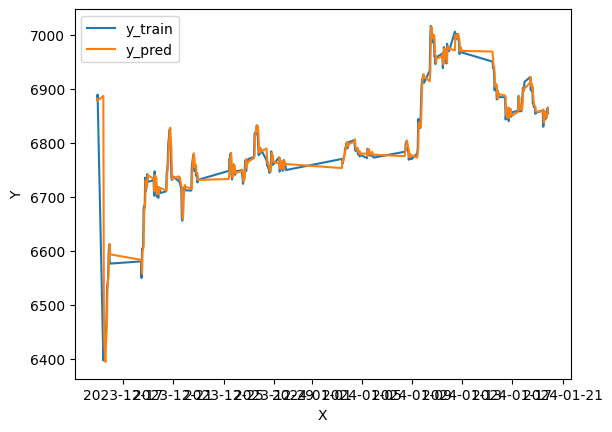

In [ ]:
print("MSE val:", get_MSE(predict(X_val), y_val))
plot(y_val, predict(X_val), val_dates)

In [ ]:
y_train_predict = predict(X_train)
y_val_predict = predict(X_val)

In [ ]:
print("RMSE train:", np.sqrt(get_MSE(y_train, y_train_predict)))
print("RMSE validation:", np.sqrt(get_MSE(y_val, y_val_predict)))

RMSE train: 27.359762125968665
RMSE validation: 31.44699403867091


In [ ]:
y_val_predict

array([[6881.01741237],
       [6877.55434193],
       [6886.50529891],
       [6491.27387301],
       [6429.17559462],
       [6408.3400018 ],
       [6394.6807956 ],
       [6429.74969452],
       [6445.76092932],
       [6476.03352869],
       [6527.78936605],
       [6546.27808491],
       [6554.97824455],
       [6590.9265532 ],
       [6612.89333396],
       [6593.58407878],
       [6583.47060698],
       [6582.93584248],
       [6558.14462128],
       [6597.56069184],
       [6605.30743221],
       [6608.91851889],
       [6671.41343765],
       [6686.49824383],
       [6686.03556949],
       [6730.78690004],
       [6717.67173349],
       [6717.59875773],
       [6725.14442671],
       [6740.08977977],
       [6733.45518609],
       [6733.73782395],
       [6710.16388164],
       [6740.15479067],
       [6722.97680243],
       [6735.17051533],
       [6721.49440766],
       [6704.86756347],
       [6710.98122881],
       [6717.7889054 ],
       [6704.32954649],
       [6716.907